                    runtime
cores percentage           
1     0.1         20.350216
2     0.2         19.350325
4     0.4         21.703170
8     0.8         33.666810
10    1.0         48.048983
                    runtime  scale-up
cores percentage                     
1     0.1         20.350216  1.000000
2     0.2         19.350325  1.051673
4     0.4         21.703170  0.937661
8     0.8         33.666810  0.604459
10    1.0         48.048983  0.423531


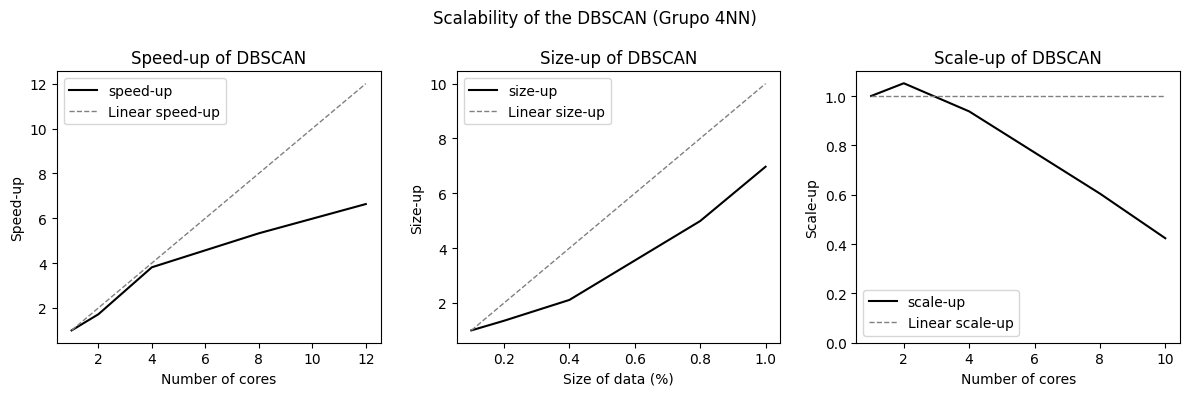

In [6]:
import sys
import pandas as pd
from matplotlib import pyplot as plt
import subprocess


def plot_scalability_global(name, stats, xlabel, x_vals, linear_vals, ax):
    ax.set_title(f"{name.capitalize()} of DBSCAN")
    ax.plot(x_vals, stats[name], 'k', label=f"{name}")
    ax.plot(x_vals, linear_vals, '--', color='gray',
            label=f"Linear {name}", linewidth=1)
    ax.set(xlabel=xlabel, ylabel=name.capitalize())
    ax.legend()

    if name == 'scale-up':
        ax.set_ylim([0, 1.1])


def main(argv):
    # Create the plot
    fig, ax = plt.subplots(1, 3, figsize=(12, 4))
    fig.suptitle(f"Scalability of the DBSCAN (Grupo 4NN)")
    REPS = 5
    # ------------------------------------ Speed-up ------------------------------------

    num_cores = [1, 2, 4, 8, 12]

    """
    for i in range(REPS):
        for j in num_cores:
            subprocess.run(["python", "code/scalability-DBSCAN.py",
                           str(j), str(1.0), f"speedup_global.csv"])
    """
    results = pd.read_csv(
        f"speedup_global.csv",
        names=["cores", "percentage", "runtime"],
    )
    avg_results = results.groupby("cores").mean()
    avg_results["speed-up"] = avg_results["runtime"][1] / \
        avg_results["runtime"]

    plot_scalability_global('speed-up', avg_results,
                            "Number of cores", num_cores, num_cores, ax[0])

    # ------------------------------------ Size-up ------------------------------------

    sizes = [0.1, 0.2, 0.4, 0.8, 1.0]
    """
    for i in range(REPS):
        for fraction in sizes:
            subprocess.run(["python", "code/scalability-DBSCAN.py",
                           str(8), str(fraction) , f"sizeup_global.csv"])
    """
    results = pd.read_csv(
        f'sizeup_global.csv',
        names=["cores", "percentage", "runtime"],
    )
    avg_results = results.groupby("percentage").mean()
    avg_results["size-up"] = avg_results["runtime"] / avg_results["runtime"][0.1]
    linear_sizeup = [1, 2, 4, 8, 10]
    plot_scalability_global('size-up', avg_results,
                            "Size of data (%)", sizes, linear_sizeup, ax[1])

    # ------------------------------------ Scale-up ------------------------------------

    num_cores = [1, 2, 4, 8, 10]
    sizes = [0.1, 0.2, 0.4, 0.8, 1.0]
    """
    for i in range(REPS):
        for j in range(len(num_cores)):
            subprocess.run(["python", "code/scalability-DBSCAN.py",
                           str(num_cores[j]), str(sizes[j]), f"scaleup_global.csv"])
    """
    results = pd.read_csv(
        f'scaleup_global.csv',
        names=["cores", "percentage", "runtime"],
    )
    avg_results = results.groupby(["cores", "percentage"]).mean()
    print(avg_results)
    avg_results["scale-up"] = avg_results["runtime"][(1, 0.1)] / avg_results["runtime"]
    print(avg_results)
    ideal_scaleup = [1]*5
    plot_scalability_global('scale-up', avg_results,
                            "Number of cores", num_cores, ideal_scaleup, ax[2])

    # storing it with the rest of the figures
    plt.tight_layout()
    plt.savefig(
        f"img/scalability_global.svg", bbox_inches="tight", pad_inches=0.0)

if __name__ == "__main__":
    main(sys.argv[1:])
